In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#reading data as excel as csv file is too big
dating = pd.read_excel('/home/amybirdee/hobby_projects/dating_site/profiles.xlsx')

In [3]:
dating.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23.0,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29.0,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [4]:
#checking number of rows and columns
dating.shape

(59949, 31)

In [5]:
#checking datatypes
dating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59949 entries, 0 to 59948
Data columns (total 31 columns):
age            59946 non-null float64
body_type      54650 non-null object
diet           35551 non-null object
drinks         56961 non-null object
drugs          45866 non-null object
education      53318 non-null object
essay0         54456 non-null object
essay1         52361 non-null object
essay2         50287 non-null object
essay3         48457 non-null object
essay4         49405 non-null object
essay5         49087 non-null object
essay6         46154 non-null object
essay7         47488 non-null object
essay8         40709 non-null object
essay9         47328 non-null object
ethnicity      54263 non-null object
height         59940 non-null float64
income         59943 non-null float64
job            51745 non-null object
last_online    59943 non-null object
location       59943 non-null object
offspring      24383 non-null object
orientation    59943 non-null object


In [6]:
#descibing the data
dating.describe(include = 'all')

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
count,59946.000000,54650,35551,56961,45866,53318,54456,52361,50287,48457,...,59943,24383,59943,40023,39717,59943,48887,54431,59893,59943
unique,NaN,12,18,6,3,32,54348,51503,48614,43520,...,199,15,3,15,45,2,48,5,7646,5
top,NaN,average,mostly anything,socially,never,graduated from college/university,.,enjoying it.,listening,my smile,...,"san francisco, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,agnosticism,m,gemini and it&rsquo;s fun to think about,no,english,single
freq,NaN,14652,16585,41780,37724,23959,12,61,82,529,...,31064,7559,51603,14813,2723,35826,1782,43893,21828,55695
mean,32.340290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.452779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#checking column names
dating.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [8]:
#dropping the essay columns and not needed for analysis
dating = dating.drop(['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9'], axis = 1)

In [9]:
dating.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1.0,transportation,...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,average,mostly other,often,sometimes,working on space camp,white,70.0,80000.0,hospitality / travel,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1.0,NaN,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23.0,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000.0,student,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29.0,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1.0,artistic / musical / writer,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [10]:
#converting date column to date, it's currently object
dating['last_online'] = pd.to_datetime(dating.last_online)

In [11]:
dating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59949 entries, 0 to 59948
Data columns (total 21 columns):
age            59946 non-null float64
body_type      54650 non-null object
diet           35551 non-null object
drinks         56961 non-null object
drugs          45866 non-null object
education      53318 non-null object
ethnicity      54263 non-null object
height         59940 non-null float64
income         59943 non-null float64
job            51745 non-null object
last_online    59943 non-null datetime64[ns]
location       59943 non-null object
offspring      24383 non-null object
orientation    59943 non-null object
pets           40023 non-null object
religion       39717 non-null object
sex            59943 non-null object
sign           48887 non-null object
smokes         54431 non-null object
speaks         59893 non-null object
status         59943 non-null object
dtypes: datetime64[ns](1), float64(3), object(17)
memory usage: 9.6+ MB


In [12]:
#filling in nan values - using averages for numeric values and most common for some non-numeric variables where there are
#only a few missing values. Otherwise filling with 'no response given' 
dating['age'] = dating.age.fillna(dating['age'].mean())
dating['body_type'] = dating.body_type.fillna('average')
dating['diet'] = dating.diet.fillna('no response given')
dating['drinks'] = dating.drinks.fillna('no response given')
dating['drugs'] = dating.drugs.fillna('no response given')
dating['education'] = dating.education.fillna('no response given')
dating['ethnicity'] = dating.ethnicity.fillna('no response given')
dating['height'] = dating.height.fillna(dating['height'].mean())
dating['income'] = dating.income.fillna(dating['income'].mean())
dating['job'] = dating.job.fillna('no response given')
dating['location'] = dating.location.fillna('no response given')
dating['offspring'] = dating.offspring.fillna('no response given')
dating['orientation'] = dating.orientation.fillna('no response given')
dating['pets'] = dating.pets.fillna('no response given')
dating['religion'] = dating.religion.fillna('no response given')
dating['sex'] = dating.sex.fillna('no response given')
dating['sign'] = dating.sign.fillna('no response given')
dating['smokes'] = dating.smokes.fillna('no response given')
dating['speaks'] = dating.speaks.fillna('no response given')
dating['status'] = dating.status.fillna('no response given')

In [13]:
#apostrophes are being replaces with '&rsquo;' - fixing this
dating['offspring'] = dating['offspring'].str.replace('doesn&rsquo;t', "doesn't")
dating['sign'] = dating['sign'].str.replace('doesn&rsquo;t', "doesn't")

In [14]:
#converting numeric fields to integers rather than floats
dating['age'] = dating.age.astype(int)
dating['height'] = dating.height.astype(int)
dating['income'] = dating.income.astype(int)

In [15]:
#there are 6 rows where last_online is blank - filtering for these so they can be deleted as most fields aren't filled in
last_online_blank = dating.loc[dating['last_online'].isnull()]
last_online_blank

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
18842,65,average,no response given,socially,no response given,graduated from ph.d program,no response given,68,20033,no response given,...,no response given,no response given,no response given,no response given,no response given,no response given,no response given,no response given,no response given,no response given
18843,32,average,no response given,no response given,no response given,no response given,no response given,68,20033,no response given,...,no response given,no response given,no response given,no response given,no response given,no response given,no response given,no response given,no response given,no response given
20594,26,skinny,strictly vegetarian,socially,never,graduated from college/university,no response given,68,20033,no response given,...,no response given,no response given,no response given,no response given,no response given,no response given,no response given,no response given,no response given,no response given
20595,32,average,no response given,no response given,no response given,no response given,no response given,68,20033,no response given,...,no response given,no response given,no response given,no response given,no response given,no response given,no response given,no response given,no response given,no response given
27530,36,athletic,mostly other,not at all,never,graduated from college/university,no response given,68,20033,no response given,...,no response given,no response given,no response given,no response given,no response given,no response given,no response given,no response given,no response given,no response given
27531,32,average,no response given,no response given,no response given,no response given,no response given,68,20033,no response given,...,no response given,no response given,no response given,no response given,no response given,no response given,no response given,no response given,no response given,no response given


In [16]:
#deleting rows where last_online is blank by the index value
dating = dating.drop([18842, 18843, 20594, 20595, 27530, 27531]).reset_index(drop = True)

In [17]:
#all records now filled in
dating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59943 entries, 0 to 59942
Data columns (total 21 columns):
age            59943 non-null int64
body_type      59943 non-null object
diet           59943 non-null object
drinks         59943 non-null object
drugs          59943 non-null object
education      59943 non-null object
ethnicity      59943 non-null object
height         59943 non-null int64
income         59943 non-null int64
job            59943 non-null object
last_online    59943 non-null datetime64[ns]
location       59943 non-null object
offspring      59943 non-null object
orientation    59943 non-null object
pets           59943 non-null object
religion       59943 non-null object
sex            59943 non-null object
sign           59943 non-null object
smokes         59943 non-null object
speaks         59943 non-null object
status         59943 non-null object
dtypes: datetime64[ns](1), int64(3), object(17)
memory usage: 9.6+ MB


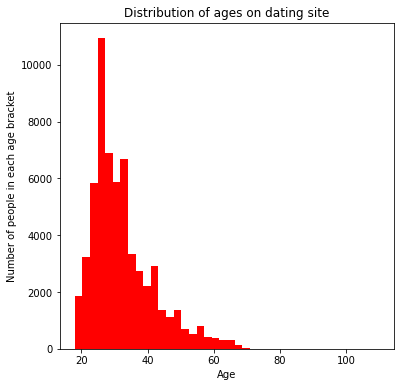

In [18]:
#checking age distribution - shows a right skew
plt.figure(figsize = (6,6))
dating['age'].hist(bins = 40, color = 'red')
plt.xlabel('Age')
plt.ylabel('Number of people in each age bracket')
plt.title('Distribution of ages on dating site')
plt.grid(None)
plt.savefig('Age - histogram')

In [19]:
#grouping by age to see the data - a couple of ages over 100 - anomalies or might be false data
Age = dating.groupby('age').size().reset_index().rename(columns = {0: 'count_of_age'})
Age.head()

,age,count_of_age
0,18,309
1,19,611
2,20,953
3,21,1282
4,22,1934


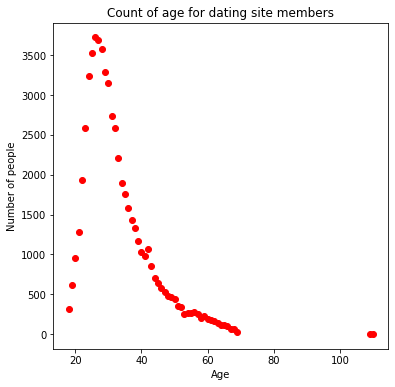

In [20]:
#plotting a scatter plot of ages - most people are mid 20s-30
plt.figure(figsize = (6,6))
plt.scatter(Age['age'], Age['count_of_age'], color = 'red')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.title('Count of age for dating site members')
plt.savefig('Age - scatter plot')

In [21]:
#grouping ages into 7 groups for barplot using pd.cut to cut the age column
bins = [17, 20, 30, 40, 50, 60, 70, np.inf]
labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60-70', '70+']
Age['age_range'] = pd.cut(Age['age'], bins = bins, labels = labels)
Age.head()

,age,count_of_age,age_range
0,18,309,<20
1,19,611,<20
2,20,953,<20
3,21,1282,20-30
4,22,1934,20-30


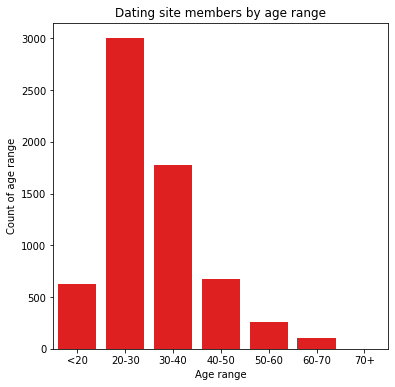

In [22]:
#barplot of ages - ci = None removes the confidence intervals
plt.figure(figsize = (6,6))
ax = sns.barplot(x = Age['age_range'], y = Age['count_of_age'], color = 'red', ci = None)
plt.xlabel('Age range')
plt.ylabel('Count of age range')
plt.title('Dating site members by age range')
plt.savefig('Age - barplot')

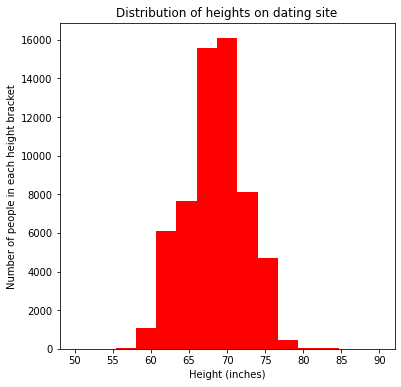

In [23]:
#checking height distribution - shows a relatively normal distribution
plt.figure(figsize = (6,6))
dating['height'].hist(bins = 15, range = [50, 90], color = 'red')
plt.xlabel('Height (inches)')
plt.ylabel('Number of people in each height bracket')
plt.title('Distribution of heights on dating site')
plt.grid(None)
plt.savefig('Height - histogram')

In [24]:
#grouping by height to see the data - most people are 60-70 inches but 20 are 95 inches. A few people in the 1-9 inch
#category - these are likely incorrect datapoints which haven't been filled in properly 
height = dating.groupby('height').size().reset_index().rename(columns = {0: 'count_of_height'})
height.head()

,height,count_of_height
0,1,1
1,3,1
2,4,1
3,6,1
4,8,1


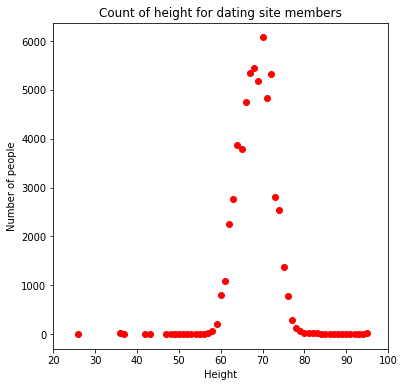

In [25]:
#plotting a scatter plot of heights - have excluded the very low heights that were clearly wrong
plt.figure(figsize = (6,6))
ax = plt.subplot()
plt.scatter(height['height'], height['count_of_height'], color = 'red')
ax.set_xlim(20, 100)
plt.xlabel('Height')
plt.ylabel('Number of people')
plt.title('Count of height for dating site members')
plt.savefig('Height - scatter plot')

In [26]:
#grouping heights into groups for barplot using pd.cut to cut the height column
bins = [0, 40, 50, 60, 70, 80, 90, np.inf]
labels = ['<40', '40-50', '50-60', '60-70', '70-80', '80-90', '90+']
height['height_range'] = pd.cut(height['height'], bins = bins, labels = labels)
height.head()

,height,count_of_height,height_range
0,1,1,<40
1,3,1,<40
2,4,1,<40
3,6,1,<40
4,8,1,<40


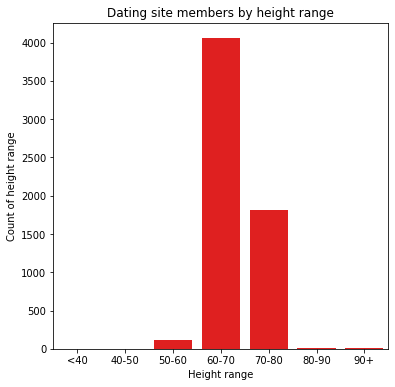

In [27]:
#barplot of heights
plt.figure(figsize = (6,6))
ax = sns.barplot(x = height['height_range'], y = height['count_of_height'], color = 'red', ci = None)
plt.xlabel('Height range')
plt.ylabel('Count of height range')
plt.title('Dating site members by height range')
plt.savefig('Height - barplot')

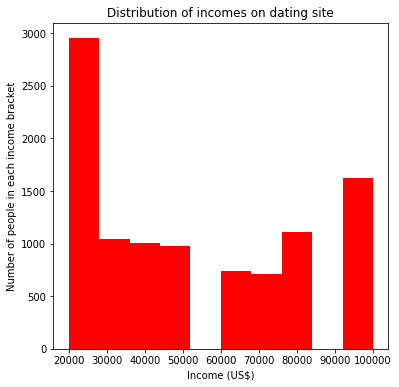

In [28]:
#checking income distribution - most people are on lower incomes but many did not fill this fields in. A few people also
#said their income was $1,000,000 which propbably isn't true - have excluded from chart
plt.figure(figsize = (6,6))
dating['income'].hist(bins = 10, range = [20000, 100000], color = 'red')
plt.xlabel('Income (US$)')
plt.ylabel('Number of people in each income bracket')
plt.title('Distribution of incomes on dating site')
plt.grid(None)
plt.savefig('Income - histogram')

In [29]:
#grouping by income to see the data - 81% of people put -1 for this which likely means they didn't answer the question
income = dating.groupby('income').size().reset_index().rename(columns = {0: 'count_of_income'})
income.head()

,income,count_of_income
0,-1,48440
1,20000,2952
2,30000,1048
3,40000,1004
4,50000,975


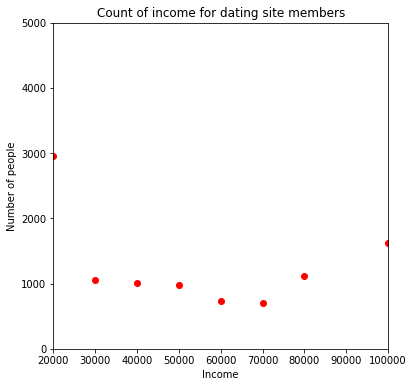

In [30]:
#plotting a scatter plot of income - have excluded the very low and high incomes that were clearly wrong or incomplete
plt.figure(figsize = (6,6))
ax = plt.subplot()
plt.scatter(income['income'], income['count_of_income'], color = 'red')
ax.set_xlim(20000, 100000)
ax.set_ylim(0, 5000)
plt.xlabel('Income')
plt.ylabel('Number of people')
plt.title('Count of income for dating site members')
plt.savefig('Income - scatter plot')

In [31]:
#grouping income into groups for barplot using pd.cut to cut the income column
bins = [0, 40000, 60000, 80000, 100000, np.inf]
labels = ['<40', '40-60', '60-80', '80-100', '100+']
income['income_range'] = pd.cut(income['income'], bins = bins, labels = labels)
income

,income,count_of_income,income_range
0,-1,48440,NaN
1,20000,2952,<40
2,30000,1048,<40
3,40000,1004,<40
4,50000,975,40-60
5,60000,736,40-60
6,70000,707,60-80
7,80000,1111,60-80
8,100000,1621,80-100
9,150000,631,100+


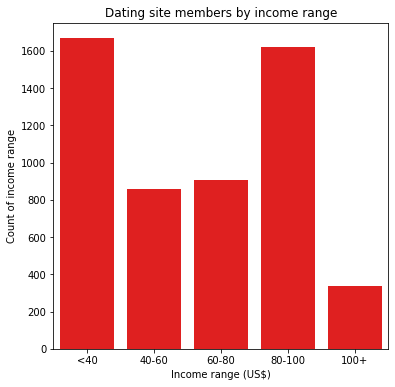

In [32]:
#barplot of income - have excluded those who didn't fill this in
plt.figure(figsize = (6,6))
ax = sns.barplot(x = income['income_range'], y = income['count_of_income'], color = 'red', ci = None)
plt.xlabel('Income range (US$)')
plt.ylabel('Count of income range')
plt.title('Dating site members by income range')
plt.savefig('Income - barplot')

In [33]:
#converting dating dataframe to csv as will continue analysising categorical values in a new notebook
dating = dating.to_csv('/home/amybirdee/hobby_projects/dating_site/dating_clean.csv', index = False)